Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).
Этапы работы:

    1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
    2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
    3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
    4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
    5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
    6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
        a. Сделайте выводы.
        b. Удалите признаки на основании полученных значений, выводов.
        c. Повторите п. 3, п. 4 на измененных данных.
    7. Исследуйте оставленные признаки на выбросы.
        a. Удалите выбросы в случае обнаружения.
        b. Повторите п. 3, п. 4 на измененных данных.
    8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
        a. Повторите п. 3, п. 4 на измененных данных.
    9. Сформулируйте выводы по проделанной работе.
        a. Кратко опишите какие преобразования были сделаны с данными.
        b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
        c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# загрузка данных
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
import pandas as pd
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.info() # пропусков нет
Y = pd.DataFrame(housing.target,columns=housing.target_names)
Y.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [3]:
# разделяю данные, обучаю модель, считаю метрики
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train_1 = model.score(X_train, y_train)
r2_test_1 = model.score(X_test, y_test)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train_1 = np.sqrt(mse_train)
rmse_test_1 = np.sqrt(mse_test)
print(f"r2_train_1: {r2_train_1}")
print(f"r2_test_: {r2_test_1}")
# print(f"mse_train: {mse_train}")
# print(f"mse_test: {mse_test}")
print(f"rmse_train_1: {rmse_train_1}")
print(f"rmse_test_1: {rmse_test_1}")

r2_train_1: 0.6125511913966952
r2_test_: 0.5757877060324508
rmse_train_1: 0.7196757085831575
rmse_test_1: 0.7455813830127764


array([[<Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

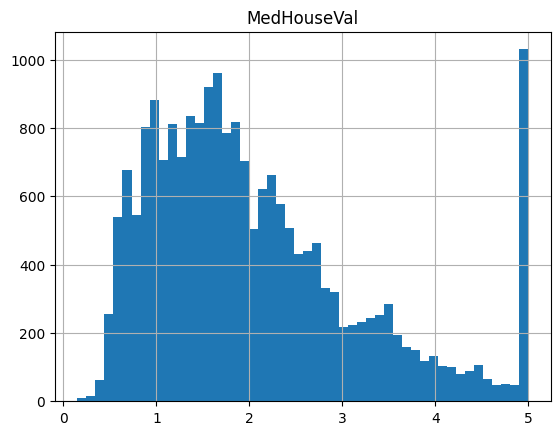

In [4]:
# строю распределение целевой переменной
# выбросы присутствуют - много самых дорогих домов
Y.hist(bins=50)

In [5]:
# строю корреляционную матрицу
corr = X.corr()
corr.style.background_gradient()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Сильная корреляция между AveRooms и AveBedrooms, также AveRooms коррелирует с MedInc, признак AveRooms можно удалить.<br>
Изначально хотел удалить широту и долготу, т.к. они также коррелируют между собой. Однако практика показала, что удаление этих признаков привело к ухудшению качества модели.
HouseAge также коррелирует с Population, еготакже убираю.

In [6]:
# убираю лишние признаки
X1 = X.drop(columns=['AveRooms', 'Population'])
X1.describe()

,MedInc,HouseAge,AveBedrms,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,1.096675,3.070655,35.631861,-119.569704
std,1.899822,12.585558,0.473911,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.333333,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,1.006079,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,1.048780,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,1.099526,3.282261,37.710000,-118.010000
max,15.000100,52.000000,34.066667,1243.333333,41.950000,-114.310000


In [7]:
# разделяю данные, обучаю модель, считаю метрики на удалённых данных
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train_2 = model.score(X_train, y_train)
r2_test_2 = model.score(X_test, y_test)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train_2 = np.sqrt(mse_train)
rmse_test_2 = np.sqrt(mse_test)
print(f"r2_train_2: {r2_train_2}")
print(f"r2_test_2: {r2_train_2}")
# print(f"mse_train: {mse_train}")
# print(f"mse_test: {mse_test}")
print(f"rmse_train_2: {rmse_train_2}")
print(f"rmse_test_2: {rmse_test_2}")

r2_train_2: 0.6043609886088384
r2_test_2: 0.6043609886088384
rmse_train_2: 0.7272424699930649
rmse_test_2: 0.7419183424194717


Как ни странно, метрики незначительно изменились в худшую сторону.

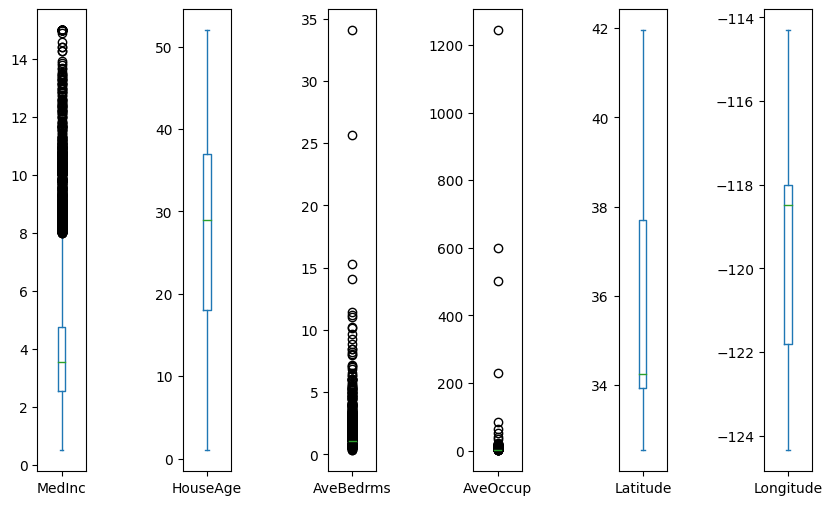

In [8]:
# смотрю выбросы, они есть везде, кроме HouseAge
X1.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)
plt.subplots_adjust(wspace=2) 
plt.show()

In [9]:
X1.shape

(20640, 6)

In [10]:
# удаляю выбросы через межквартильный разброс
Q1 = X1.quantile(q=.25)
Q3 = X1.quantile(q=.75)
IQR = X1.apply(stats.iqr)
X1_c = X1[~((X1 < (Q1-1.5*IQR)) | (X1 > (Q3+1.5*IQR))).any(axis=1)]
X1_c.shape


(17937, 6)

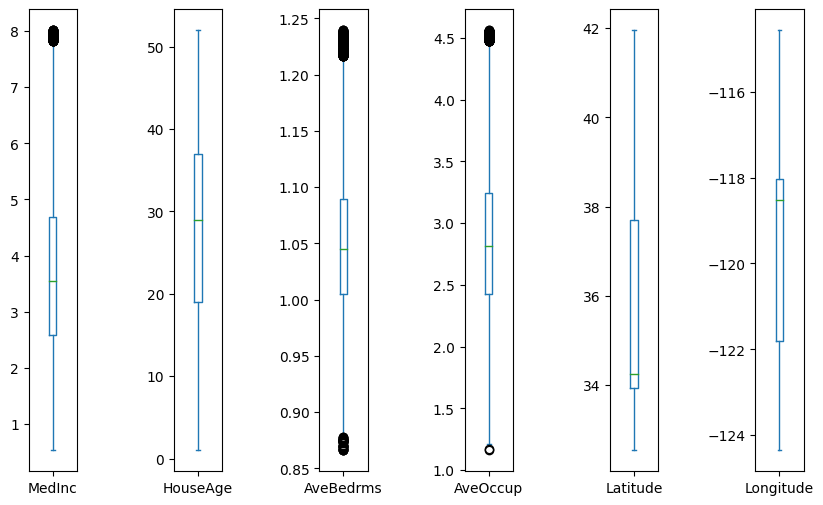

In [11]:
# смотрю, что получилось
# совсем явные выбросы удалил
X1_c.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)
plt.subplots_adjust(wspace=2) 
plt.show()

In [12]:
# удаляю строки с выбросами также из целевой переменной
Y_c = Y.copy()
Y_c = Y_c[Y_c.index.isin(X1_c.index)]

In [13]:
# снова считаю метрики
X_train, X_test, y_train, y_test = train_test_split(X1_c, Y_c, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train_3 = model.score(X_train, y_train)
r2_test_3 = model.score(X_test, y_test)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train_3 = np.sqrt(mse_train)
rmse_test_3 = np.sqrt(mse_test)
print(f"r2_train_3: {r2_train_3}")
print(f"r2_test_3: {r2_train_3}")
# print(f"mse_train: {mse_train}")
# print(f"mse_test: {mse_test}")
print(f"rmse_train_3: {rmse_train_3}")
print(f"rmse_test_3: {rmse_test_3}")

r2_train_3: 0.6269403412632308
r2_test_3: 0.6269403412632308
rmse_train_3: 0.6463635961639397
rmse_test_3: 0.6564763864401387


Метрики слегка улучшились :)

In [14]:
X1_c.describe()

,MedInc,HouseAge,AveBedrms,AveOccup,Latitude,Longitude
count,17937.000000,17937.000000,17937.000000,17937.000000,17937.000000,17937.000000
mean,3.726774,28.952779,1.048860,2.858213,35.630208,-119.601238
std,1.488790,12.477426,0.066044,0.631932,2.123324,1.991800
min,0.536000,1.000000,0.866013,1.161290,32.540000,-124.350000
25%,2.588200,19.000000,1.005013,2.427350,33.940000,-121.810000
50%,3.547300,29.000000,1.045369,2.810858,34.260000,-118.520000
75%,4.679200,37.000000,1.089474,3.244171,37.710000,-118.030000
max,8.011300,52.000000,1.239521,4.560748,41.950000,-114.570000


In [15]:
# меняю признаки математически
X1_cm = X1_c.copy()
X1_cm['MedInc'] = X1_cm['MedInc']**2
# любые изменения следующих признаков ухудшают модель, лучше не трогать
# X1_cm['HouseAge'] = np.sqrt(X1_cm['HouseAge']) 
# X1_cm['Latitude'] = np.log(X1_cm['Latitude'])
# X1_cm['Longitude'] = np.log(np.sqrt((X1_cm['Longitude']**2)))
X1_cm.head(5)

,MedInc,HouseAge,AveBedrms,AveOccup,Latitude,Longitude
2,52.669855,52.0,1.073446,2.802260,37.85,-122.24
3,31.844578,52.0,1.073059,2.547945,37.85,-122.25
4,14.793254,52.0,1.081081,2.181467,37.85,-122.25
5,16.295754,52.0,1.103627,2.139896,37.85,-122.25
6,13.389013,52.0,0.951362,2.128405,37.84,-122.25


In [16]:
# снова считаю метрики
X_train, X_test, y_train, y_test = train_test_split(X1_cm, Y_c, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
r2_train_4 = model.score(X_train, y_train)
r2_test_4 = model.score(X_test, y_test)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train_4 = np.sqrt(mse_train)
rmse_test_4 = np.sqrt(mse_test)
print(f"r2_train_4: {r2_train_4}")
print(f"r2_test_4: {r2_train_4}")
# print(f"mse_train: {mse_train}")
# print(f"mse_test: {mse_test}")
print(f"rmse_train_4: {rmse_train_4}")
print(f"rmse_test_4: {rmse_test_4}")

r2_train_4: 0.6300399870644053
r2_test_4: 0.6300399870644053
rmse_train_4: 0.6436727702301291
rmse_test_4: 0.651037109406873


In [17]:
# сравниваю модели на тестовых данных
print(f"r2_train_1: {r2_train_1}")
print(f"r2_train_2: {r2_train_2}")
print(f"r2_train_3: {r2_train_3}")
print(f"r2_train_4: {r2_train_4}")
print(f"rmse_train_1: {rmse_train_1}")
print(f"rmse_train_2: {rmse_train_2}")
print(f"rmse_train_3: {rmse_train_3}")
print(f"rmse_train_4: {rmse_train_4}")

r2_train_1: 0.6125511913966952
r2_train_2: 0.6043609886088384
r2_train_3: 0.6269403412632308
r2_train_4: 0.6300399870644053
rmse_train_1: 0.7196757085831575
rmse_train_2: 0.7272424699930649
rmse_train_3: 0.6463635961639397
rmse_train_4: 0.6436727702301291


В результате всех операций, удалось добиться незначительного улучшения точности модели и снижения RMSE.
Однако, в пинципе с такими показателями модель не совершенно и для её практического применения её нужно было бы улучшать.